In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers


In [2]:
cifar10 = keras.datasets.cifar10
print(cifar10)

<module 'tensorflow.keras.datasets.cifar10' from 'C:\\Users\\SONY\\anaconda3\\lib\\site-packages\\tensorflow\\keras\\datasets\\cifar10\\__init__.py'>


In [3]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [58]:
y_train =  y_train.reshape(-1)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

IndexError: invalid index to scalar variable.

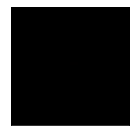

In [59]:
x_train,x_test = x_train/255.0 ,x_test/255.0
plt.figure(figsize=(10,10))
for i in range(6):
    
   
    
    plt.subplot(4,4
                ,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap =plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [60]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10 ,activation = 'Softmax'))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [61]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics  = ["accuracy"]
model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [62]:

epochs = 10

model.fit(x_train,y_train,epochs =epochs ,shuffle = True,verbose = 2)
model.evaluate(x_test,y_test,verbose = 2)

Epoch 1/10
1563/1563 - 94s - loss: 2.3026 - accuracy: 0.0971
Epoch 2/10
1563/1563 - 94s - loss: 2.3026 - accuracy: 0.0972
Epoch 3/10
1563/1563 - 94s - loss: 2.3026 - accuracy: 0.0980
Epoch 4/10
1563/1563 - 95s - loss: 2.3026 - accuracy: 0.0964
Epoch 5/10
1563/1563 - 96s - loss: 2.3026 - accuracy: 0.0982
Epoch 6/10
1563/1563 - 95s - loss: 2.3026 - accuracy: 0.0981
Epoch 7/10
1563/1563 - 97s - loss: 2.3026 - accuracy: 0.0976
Epoch 8/10
1563/1563 - 96s - loss: 2.3026 - accuracy: 0.0967
Epoch 9/10
1563/1563 - 94s - loss: 2.3026 - accuracy: 0.0952
Epoch 10/10
1563/1563 - 96s - loss: 2.3026 - accuracy: 0.0971
313/313 - 6s - loss: 2.3026 - accuracy: 0.1000


[2.302586555480957, 0.10000000149011612]

In [69]:
y_pred = model.predict(x_test)

In [70]:
y_classes  = [np.argmax(element) for element in y_pred]
y_classes[:5]

[2, 2, 2, 2, 2]

In [76]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [77]:
class_names[:5]

['airplane', 'automobile', 'bird', 'cat', 'deer']

In [78]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(class_names[y[index]])

In [79]:
y_test = y_test.reshape(-1)

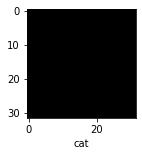

In [80]:
plot_sample(x_test,y_test,0)